In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance



In [22]:

# A1: Compute centroids and spreads for each class
def compute_centroids_and_spreads(dataframe, label_column='target'):
    import numpy as np
    class_labels = dataframe[label_column].unique()[:2]
    class_centroids = {}
    class_spreads = {}

    for class_value in class_labels:
        class_subset = dataframe[dataframe[label_column] == class_value].drop(label_column, axis=1)
        class_centroids[class_value] = np.mean(class_subset.values, axis=0)
        class_spreads[class_value] = np.std(class_subset.values, axis=0)

    inter_class_dist = np.linalg.norm(class_centroids[class_labels[0]] - class_centroids[class_labels[1]])
    return class_centroids, class_spreads, inter_class_dist



In [23]:
def plot_feature_histogram(dataframe, feature_column):
    import numpy as np
    import matplotlib.pyplot as plt

    feature_data = dataframe[feature_column]
    plt.hist(feature_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature_column}")
    plt.xlabel(feature_column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    return np.mean(feature_data), np.var(feature_data)


In [24]:
def plot_minkowski_distance(vector_a, vector_b):
    import matplotlib.pyplot as plt
    from scipy.spatial import distance

    minkowski_distances = []
    r_range = range(1, 11)
    for r in r_range:
        dist = distance.minkowski(vector_a, vector_b, p=r)
        minkowski_distances.append(dist)

    plt.plot(r_range, minkowski_distances, marker='o')
    plt.title("Minkowski Distance (r = 1 to 10)")
    plt.xlabel("r value")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(dataframe):
    features = dataframe.drop(columns=['target'])
    labels = dataframe['target']

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return train_test_split(features_scaled, labels, test_size=0.3, random_state=42, stratify=labels)


In [27]:
# A5-A7: Train and evaluate kNN classifier
from sklearn.neighbors import KNeighborsClassifier

def train_knn_classifier(features_train, labels_train, k_neighbors=3):
    knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn_model.fit(features_train, labels_train)
    return knn_model


def test_accuracy(knn_model, features_test, labels_test):
    return knn_model.score(features_test, labels_test)
def predict_labels(knn_model, features_test):
    return knn_model.predict(features_test)


In [26]:
# A8: Plot accuracy vs k for kNN
def plot_accuracy_vs_k(features_train, features_test, labels_train, labels_test):
    import matplotlib.pyplot as plt
    from sklearn.neighbors import KNeighborsClassifier

    k_range = range(1, 12)
    accuracy_scores = []

    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(features_train, labels_train)
        accuracy_scores.append(model.score(features_test, labels_test))

    plt.plot(k_range, accuracy_scores, marker='o')
    plt.title("k vs Accuracy")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()


In [25]:
# A9: Print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_performance(knn_model, features, labels, dataset_type="Test"):
    predictions = knn_model.predict(features)
    conf_matrix = confusion_matrix(labels, predictions)
    class_report = classification_report(labels, predictions)
    print(f"\n[{dataset_type} Set] Confusion Matrix:\n", conf_matrix)
    print(f"\n[{dataset_type} Set] Classification Report:\n", class_report)


Inter-class Euclidean distance: 22.345886139364566


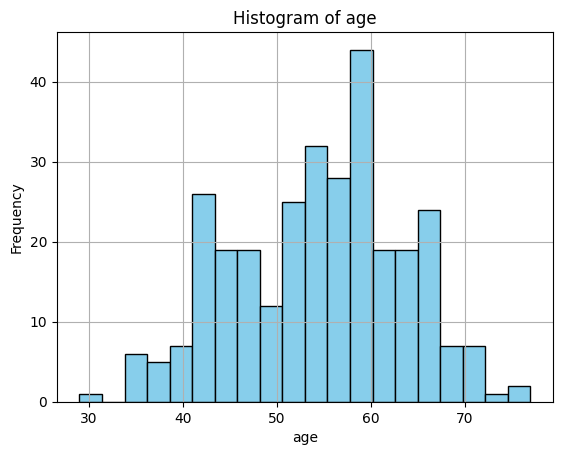

Mean Age: 54.37, Variance: 82.21


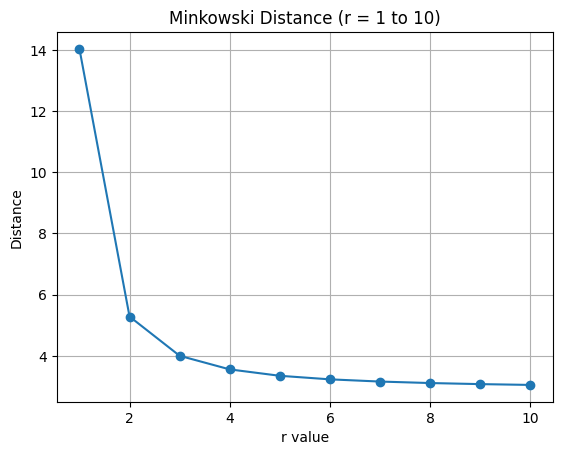

Test Accuracy (k=3): 0.76


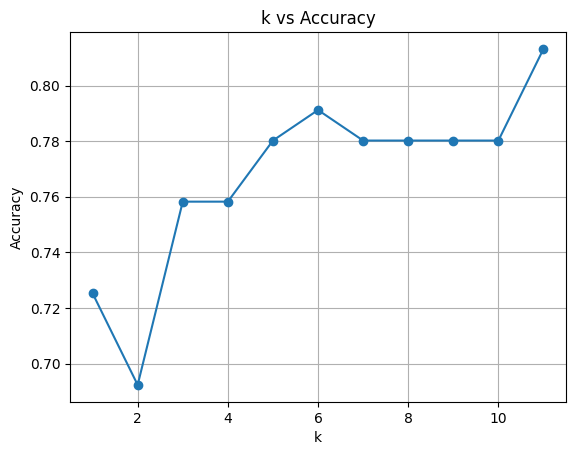


[Test Set] Confusion Matrix:
 [[26 15]
 [ 7 43]]

[Test Set] Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70        41
           1       0.74      0.86      0.80        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.75        91


[Train Set] Confusion Matrix:
 [[ 85  12]
 [ 11 104]]

[Train Set] Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        97
           1       0.90      0.90      0.90       115

    accuracy                           0.89       212
   macro avg       0.89      0.89      0.89       212
weighted avg       0.89      0.89      0.89       212



In [32]:
import pandas as pd

# Load and clean dataset
heart_df = pd.read_csv("heart.csv")
heart_df = heart_df[heart_df['target'].isin([0, 1])]
if 'id' in heart_df.columns:
    heart_df.drop(columns=['id'], inplace=True)

# Convert age to years if needed
if heart_df['age'].max() > 150:
    heart_df['age'] = heart_df['age'] // 365

# Keep unscaled copy
unscaled_df = heart_df.copy()

# === A1 ===
centroids, spreads, inter_class_dist = compute_centroids_and_spreads(unscaled_df)
print("Inter-class Euclidean distance:", inter_class_dist)

# === A2 ===
mean_age, var_age = plot_feature_histogram(unscaled_df, 'age')
print(f"Mean Age: {mean_age:.2f}, Variance: {var_age:.2f}")

# === A3 ===
scaler = StandardScaler()
features_scaled = scaler.fit_transform(heart_df.drop(columns=['target']))
plot_minkowski_distance(features_scaled[0], features_scaled[1])

# === A4 ===
X_train, X_test, y_train, y_test = prepare_data(heart_df)

# === A5 ===
knn_model = train_knn_classifier(X_train, y_train)

# === A6 ===
acc = test_accuracy(knn_model, X_test, y_test)
print(f"Test Accuracy (k=3): {acc:.2f}")

# === A7 ===
predictions = predict_labels(knn_model, X_test)

# === A8 ===
plot_accuracy_vs_k(X_train, X_test, y_train, y_test)

# === A9 ===
evaluate_performance(knn_model, X_test, y_test, "Test")
evaluate_performance(knn_model, X_train, y_train, "Train")


Original age values:
0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64
Check age column (unscaled):
0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64
Centroids computed for each class.
Spreads (Standard Deviation) computed.
Inter-class Euclidean distance: 22.35


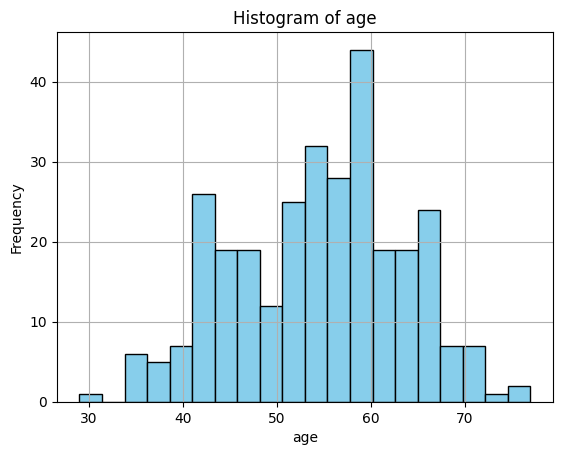

Mean of age: 54.37, Variance of age: 82.21


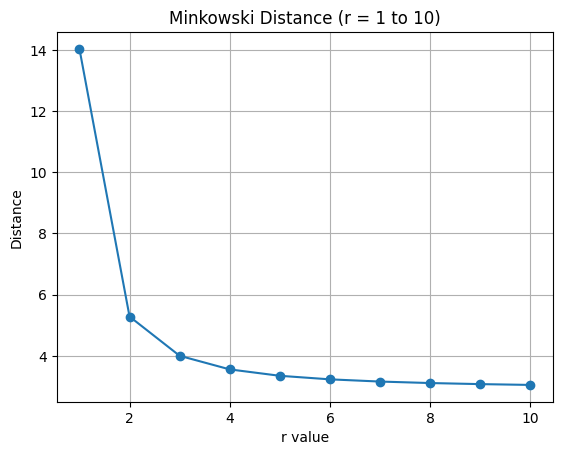

kNN Accuracy (k=3): 0.76
Predictions made on test set.


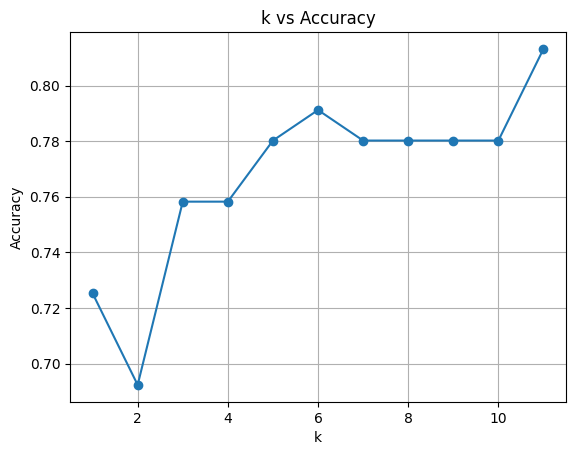


[Test Set] Confusion Matrix:
 [[26 15]
 [ 7 43]]

[Test Set] Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70        41
           1       0.74      0.86      0.80        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.75        91


[Train Set] Confusion Matrix:
 [[ 85  12]
 [ 11 104]]

[Train Set] Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        97
           1       0.90      0.90      0.90       115

    accuracy                           0.89       212
   macro avg       0.89      0.89      0.89       212
weighted avg       0.89      0.89      0.89       212


[Test Set] Confusion Matrix:
 [[26 15]
 [ 7 43]]

[Test Set] Classification Report:
               precision    recall  f1-score   support

           0       0.79    

In [33]:


if __name__ == "__main__":
    # Load dataset
    heart_df = pd.read_csv("heart.csv")
    # Filter for binary classification (target 0 or 1)
    heart_df = heart_df[heart_df['target'].isin([0, 1])]
    # Drop 'id' column if present
    if 'id' in heart_df.columns:
        heart_df.drop(columns=['id'], inplace=True)
    print("Original age values:")
    print(heart_df['age'].head())
    # Convert age from days to years if needed
    if heart_df['age'].max() > 150:
        heart_df['age'] = heart_df['age'] // 365
    # Keep a copy of unscaled data for analysis
    unscaled_df = heart_df.copy(deep=True)

    print("Check age column (unscaled):")
    print(unscaled_df['age'].head())
    # Prepare features and labels
    features = heart_df.drop(columns=['target'])
    labels = heart_df['target']
    # Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    # Split into train and test sets
    features_train, features_test, labels_train, labels_test = train_test_split(
        features_scaled, labels, test_size=0.3, random_state=42, stratify=labels
    )
    # Compute centroids and spreads
    centroids, spreads, inter_class_dist = compute_centroids_and_spreads(unscaled_df)
    print("Centroids computed for each class.")
    print("Spreads (Standard Deviation) computed.")
    print(f"Inter-class Euclidean distance: {inter_class_dist:.2f}")
    # Plot histogram for age
    mean_age, var_age = plot_feature_histogram(unscaled_df, 'age')
    print(f"Mean of age: {mean_age:.2f}, Variance of age: {var_age:.2f}")
    # Plot Minkowski distance between two samples
    sample_vec1 = features_scaled[0]
    sample_vec2 = features_scaled[1]
    plot_minkowski_distance(sample_vec1, sample_vec2)
    # Train kNN classifier
    knn_model = train_knn_classifier(features_train, labels_train)
    accuracy = test_accuracy(knn_model, features_test, labels_test)
    print(f"kNN Accuracy (k=3): {accuracy:.2f}")
    predictions = predict_labels(knn_model, features_test)
    print("Predictions made on test set.")
    # Plot accuracy vs k
    plot_accuracy_vs_k(features_train, features_test, labels_train, labels_test)
    # Evaluate performance on test and train sets
    evaluate_performance(knn_model, features_test, labels_test, dataset_type="Test")
    evaluate_performance(knn_model, features_train, labels_train, dataset_type="Train")

    evaluate_performance(knn_model, features_test, labels_test, dataset_type="Test")
evaluate_performance(knn_model, features_train, labels_train, dataset_type="Train")
